### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 27th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

#### Problem 1.1

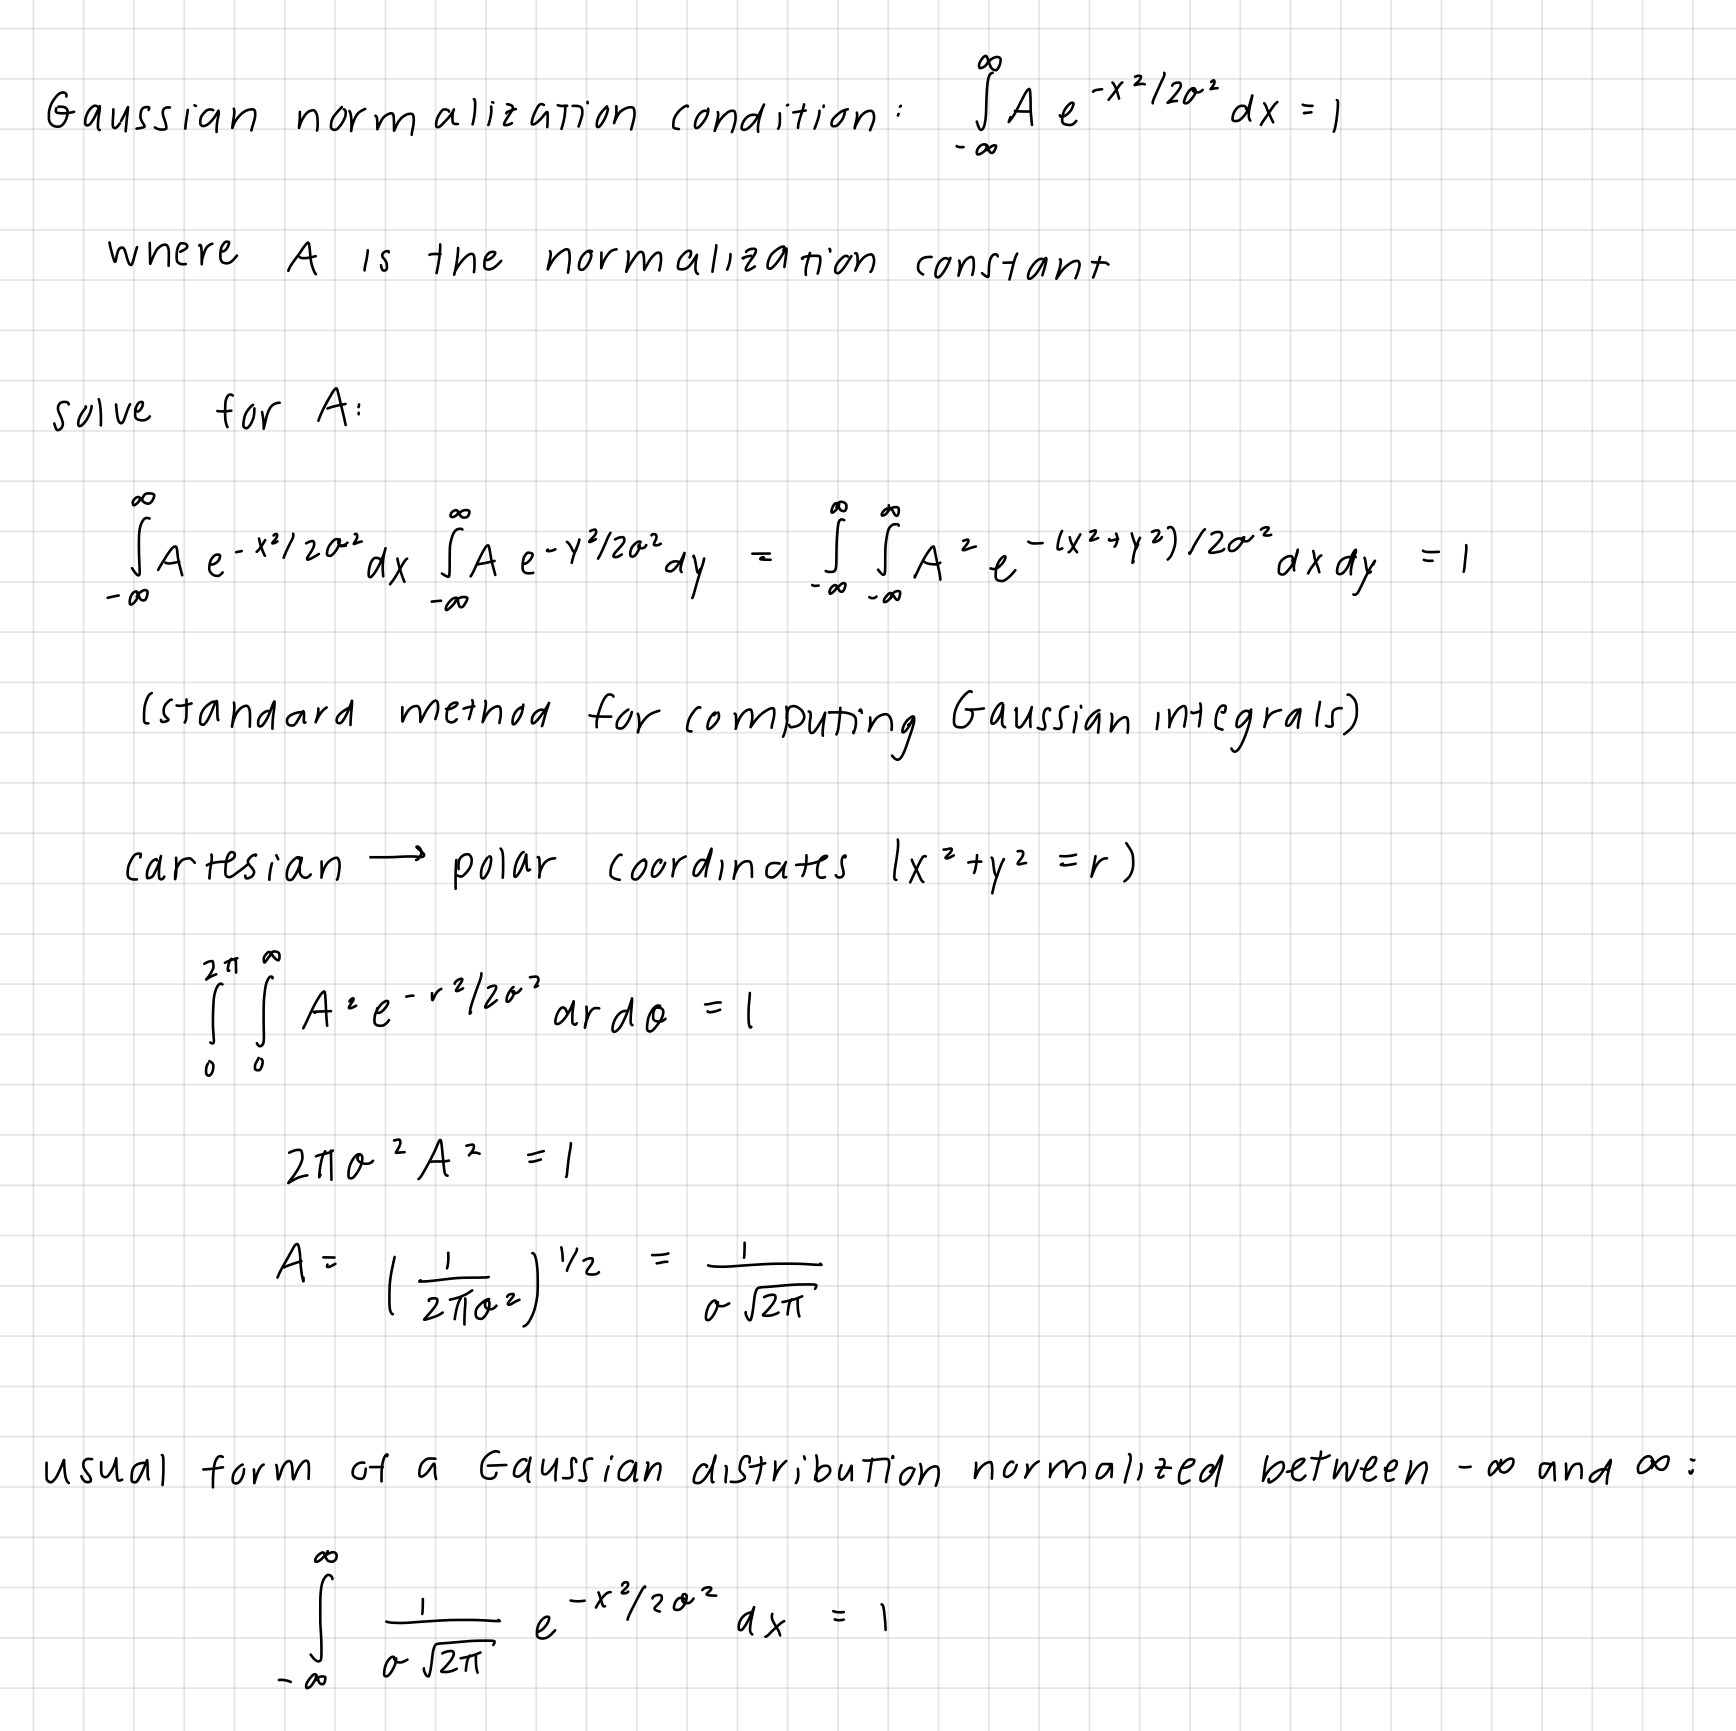

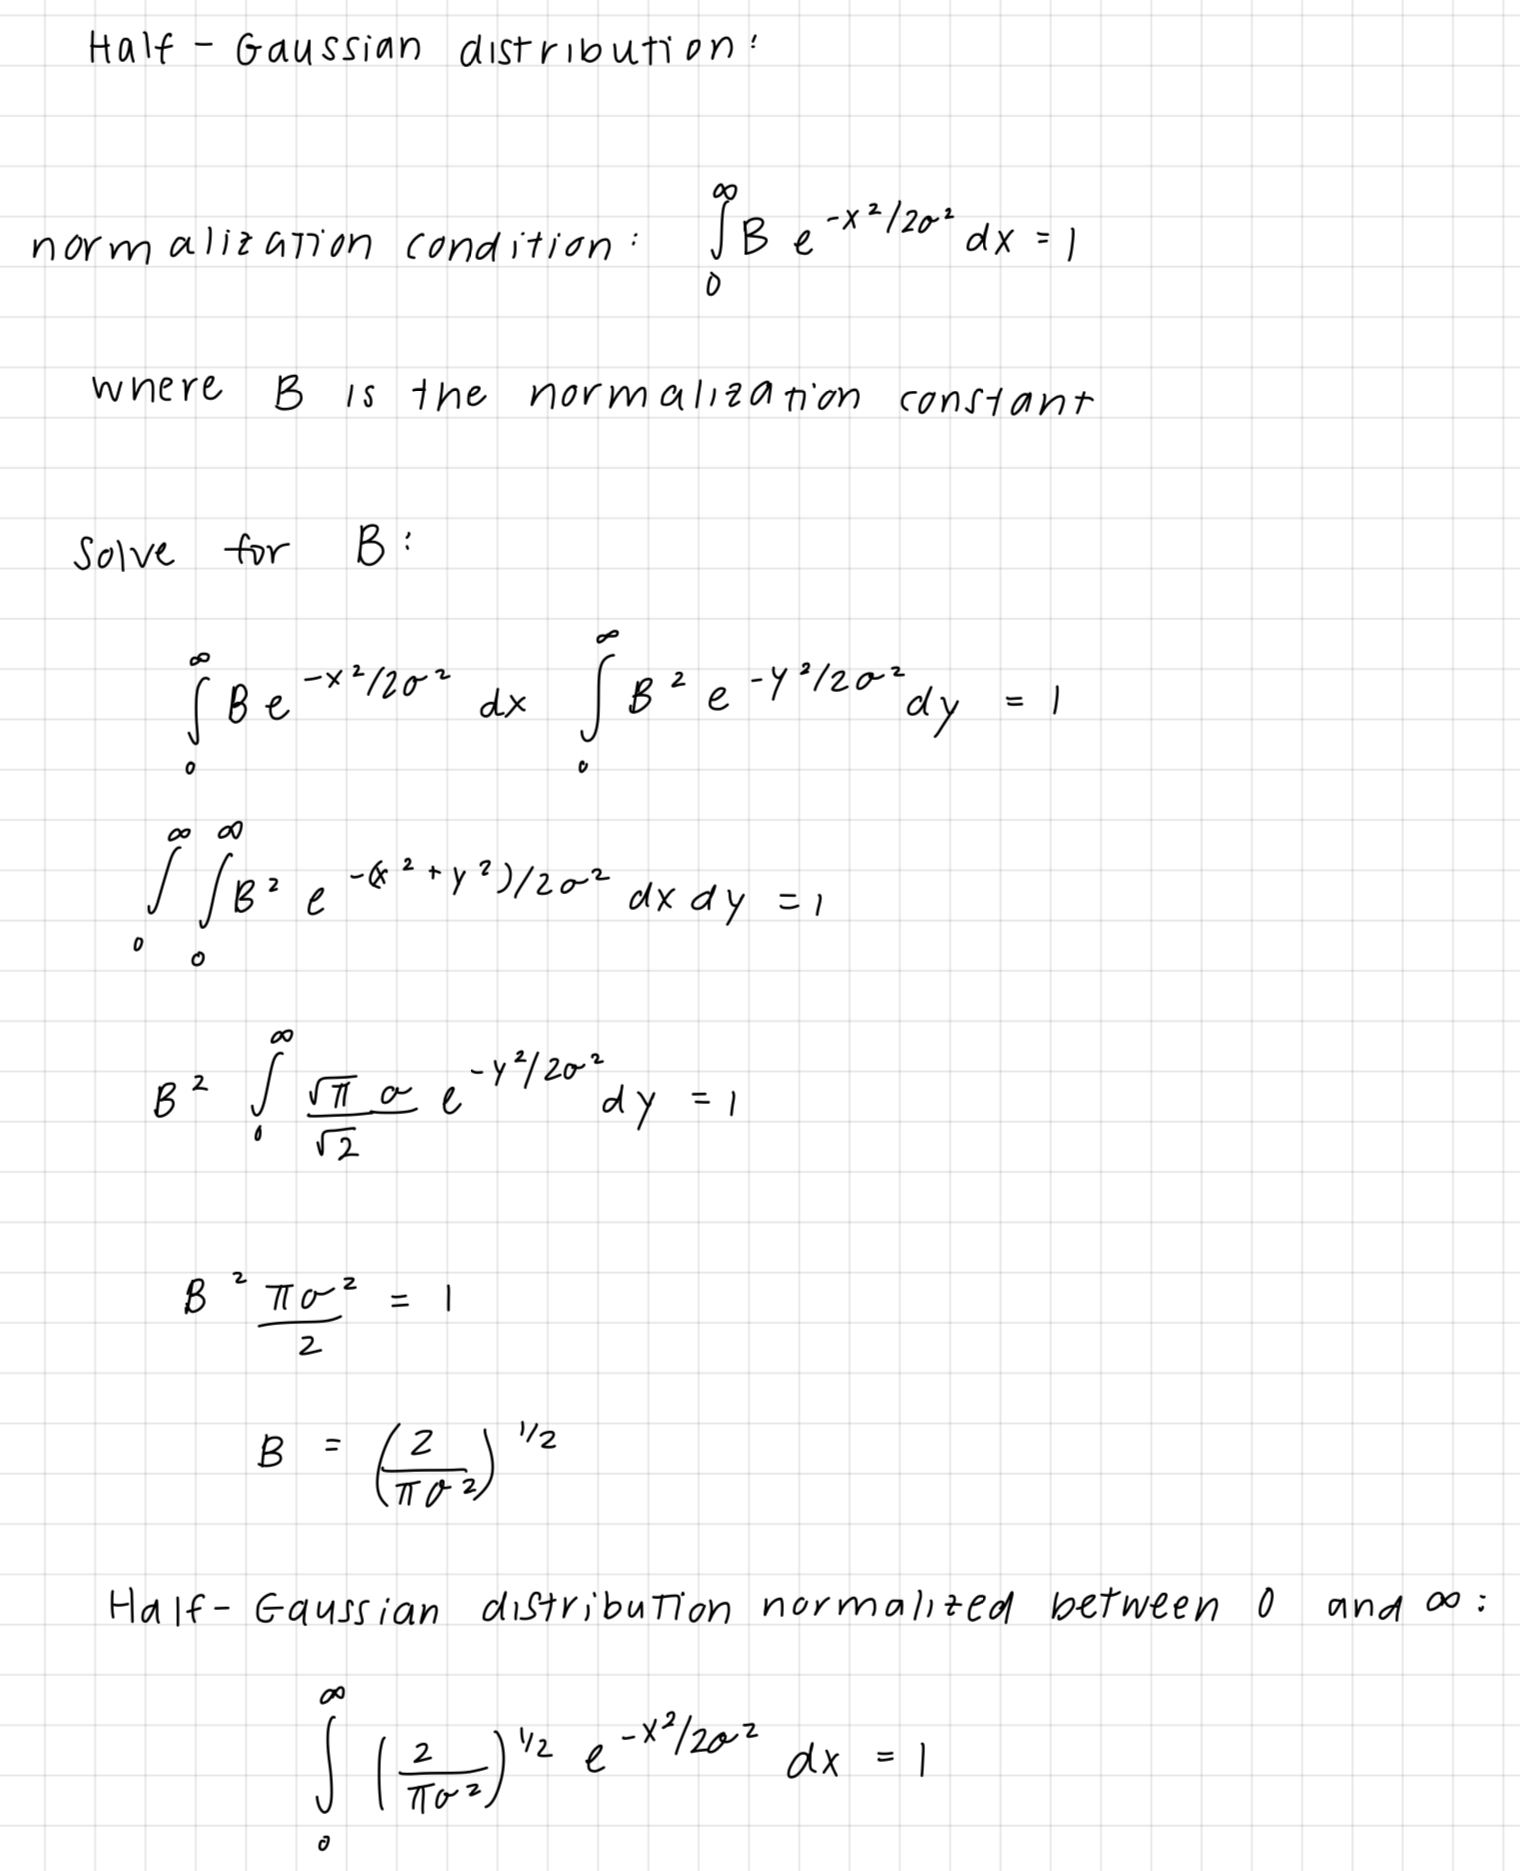

<span style="color:red">SRT: Great!</span>

#### Problem 1.2

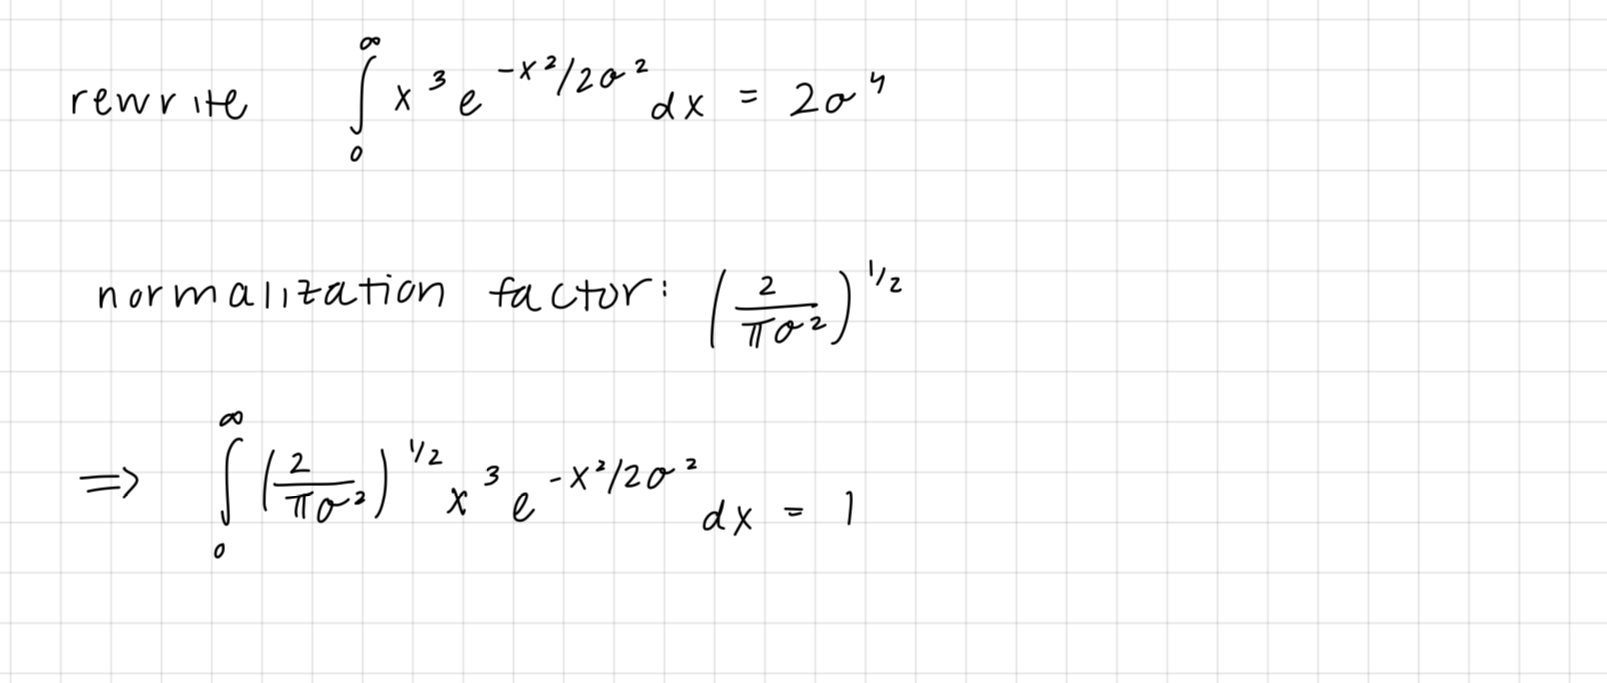

<span style="color:red">SRT: Almost. With the equation of the pdf of a half-Gaussian, you need to rewrite the integral to be in terms of $p_{HG}(x)$. We do that because we're going to draw samples from that for MC integration. -1 point.</span>

1) Standard Gaussian:

$$ p_G(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2}\frac{x^2}{\sigma^2}\right).$$

Half-Gaussian:
$$ p_{HG}(x|\mu,\sigma) = \frac{2}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2}\frac{x^2}{\sigma^2}\right). $$

2) $$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 $$

$$  \frac{2\sqrt{2\pi\sigma^2}}{2\sqrt{2\pi\sigma^2}} \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

$$ \frac{\sqrt{2\pi\sigma^2}}{2} \int_0^\infty x^3 p_{HG}(x|\mu,\sigma) \,dx = 2\sigma^4 .$$

#### Problem 1.3

In [171]:
from scipy import stats
from scipy import integrate

In [272]:
#create samples
mu_G = 0
sigma_G = 3
N = 10**5
samples = stats.uniform.rvs(loc = mu_G, scale = sigma_G, size = N) #generate samples from a gaussian distribution

#mask samples so only positive values are accepted 
mask = samples > 0
x = uniform.rvs(samples[mask], size = N)

#normalize half-gaussian
B = (2/np.pi * (sigma_G)**2)**(1/2) #normalization constant

#add numerical factor of 1/(2*sigma) to account for translation a gaussian into a half gaussian 
#(from the transformation law in lecture 2)

#integration
#def integrand(x):
    #return (1/2*sigma_G)*((x**3) * np.exp(-(x**2) / (2 * (sigma_G**2)))) <-- different attempt
    
integrand = (1/2*sigma_G)*B*((x**3) * np.exp(-(x**2) / (2 * (sigma_G**2)))) #equation from 1.2 

#monte_carlo = integrate.quad(integrand, 0, np.inf) <-- different attempt
monte_carlo = np.mean(integrand) 

#right side of the equation
right = 2*(sigma_G**4)

#check that this approximately matches the value computed from the right hand side of the equation
print("monte carlo integration:", monte_carlo)
print("right side:", right)

monte carlo integration: 29.46914596441062
right side: 162


In [ ]:
#SRT
def monte_carlo_integral(sigma):
    x = np.random.normal(0.0,sigma,100000)
    mask = x >= 0.
    x = x[mask]
    return np.mean(x**3) * 0.5 * np.sqrt(2.0*np.pi*sigma**2)

My estimate should be much closer but I dont know what else to do :( I think I may not have properly masked the samples.

#### Problem 1.4

In [271]:
#create samples
mu_G = 0
sigma_G = 3
N_1 = 10**4 # new N
samples = stats.uniform.rvs(loc = mu_G, scale = sigma_G, size = N_1) #generate samples from a gaussian distribution

#mask samples so only positive values are accepted 
mask = samples > 0
x = uniform.rvs(samples[mask], size = N_1)

#normalize half-gaussian
B = (2/np.pi * (sigma_G)**2)**(1/2)     #normalization constant

#integration
integrand = (1/2*sigma_G)*B*((x**3) * np.exp(-(x**2) / (2 * (sigma_G**2))))
monte_carlo = np.mean(integrand)

#right side of the equation
right = 2*(sigma_G**4)

#check that this approximately matches the value computed from the right hand side of the equation
print("monte carlo integration with N = 10^4:", monte_carlo)

monte carlo integration with N = 10^4: 29.098640668483846


In [268]:
#create samples
mu_G = 0
sigma_G = 3
N_2 = 10**3 # new N
samples = stats.uniform.rvs(loc = mu_G, scale = sigma_G, size = N_2) #generate samples from a gaussian distribution

#mask samples so only positive values are accepted 
mask = samples > 0
x = uniform.rvs(samples[mask], size = N_2)


#normalize half-gaussian
B = (2/np.pi * (sigma_G)**2)**(1/2)     #normalization constant

integrand = (1/2*sigma_G)*B*((x**3) * np.exp(-(x**2) / (2 * (sigma_G**2)))) #equation from 1.2

#monte carlo integration
monte_carlo = np.mean(integrand)

#right side of the equation
right = 2*(sigma_G**4)

#check that this approximately matches the value computed from the right hand side of the equation
print("monte carlo integration with N = 10^3:", monte_carlo)

monte carlo integration with N = 10^3: 28.190983580341825


In [266]:
#create samples
mu_G = 0
sigma_G = 3
N_3 = 10**2 # new N
samples = stats.uniform.rvs(loc = mu_G, scale = sigma_G, size = N_3) #generate samples from a gaussian distribution

#mask samples so only positive values are accepted 
mask = samples > 0
x = uniform.rvs(samples[mask], size = N_3)

#normalize half-gaussian
B = (2/np.pi * (sigma_G)**2)**(1/2)    #normalization constant

integrand = (1/2*sigma_G)*B*((x**3) * np.exp(-(x**2) / (2 * (sigma_G**2)))) #equation from 1.2

#monte carlo integration
monte_carlo = np.mean(integrand)


#right side of the equation
right = 2*(sigma_G**4)

#check that this approximately matches the value computed from the right hand side of the equation
print("monte carlo integration with N = 10^2:", monte_carlo)

monte carlo integration with N = 10^2: 32.224190382455824


<span style="color:red">SRT: I think you need to try this whole question again with more time. -9 points</span>

#### Problem 1.5

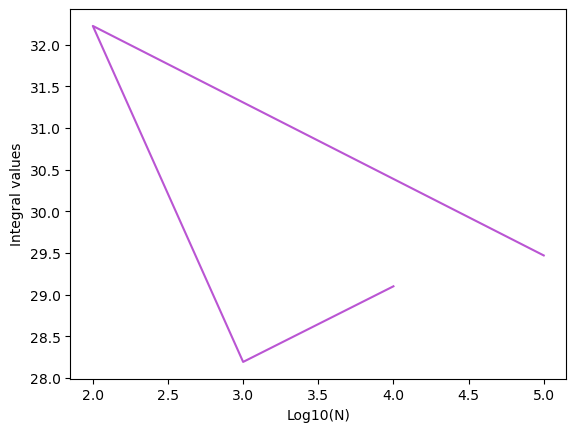

In [277]:
#x-axis
N_values = [10**5, 10**2, 10**3, 10**4]
x_N = np.log10(N_values)

# y-axis
integral_values = [29.46914596441062, 32.224190382455824, 28.190983580341825, 29.098640668483846]

#plot 
plt.plot(x_N, integral_values, color='mediumorchid')
plt.xlabel('Log10(N)')
plt.ylabel('Integral values')
plt.show()

I know this looks wrong too -- no time :/ (ill go back to this after submitting)

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

#### Problem 2.1

In [13]:
mu = 100
sigma = 15
x = 145
dist_G = scipy.stats.norm(mu, sigma) #Gaussian distribution 
draws = dist_G.rvs(10) #10 random draws
pdf = dist_G.pdf(x) #pdf at x=145

print("10 random draws:", draws)
print("pdf at x=145:", pdf)

10 random draws: [ 94.18711847 101.24543165 107.44934886  76.96220966 104.0179766
  93.65496343  98.91851235  80.78515418  76.07615907  92.24829663]
pdf at x=145: 0.0002954565607958672


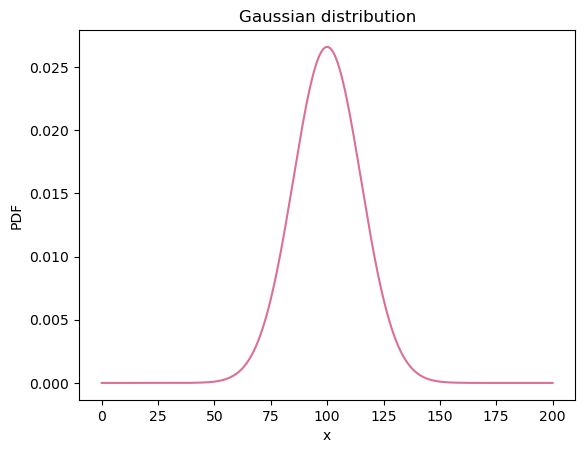

In [14]:
#plot of the distribution
x_axis=np.linspace(0, 200, 1000)
plt.plot(x_axis, dist_G.pdf(x_axis), color='palevioletred')
plt.title('Gaussian distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()

#### Problem 2.2

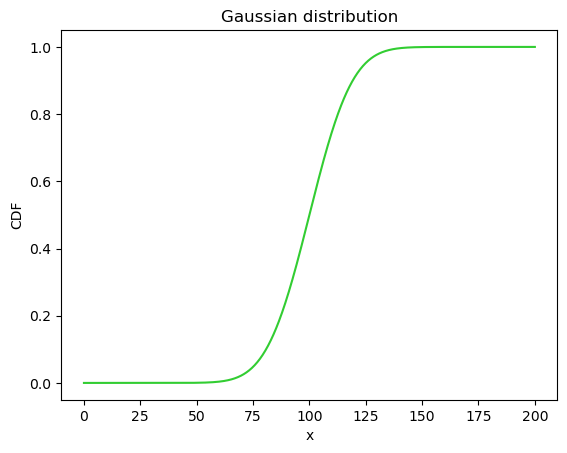

In [15]:
x_axis=np.linspace(0, 200, 1000) #same x-values
cdf = dist_G.cdf(x_axis) #cdf
plt.plot(x_axis, cdf, color='limegreen') #plot
plt.title('Gaussian distribution')
plt.xlabel('x')
plt.ylabel('CDF')
plt.show()

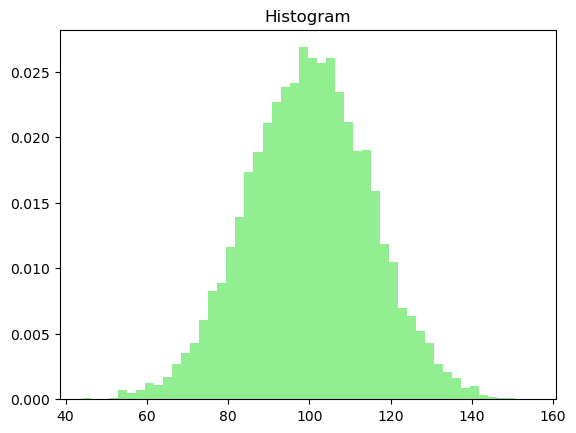

In [17]:
#inverse transform sampling
x_cdf = np.random.uniform(0, 1, 10**4) #random draws
ppf = dist_G.ppf(x_cdf) #ppf

#histogram
plt.hist(ppf, bins=50, density=True, color='lightgreen')
plt.title('Histogram')
plt.show()

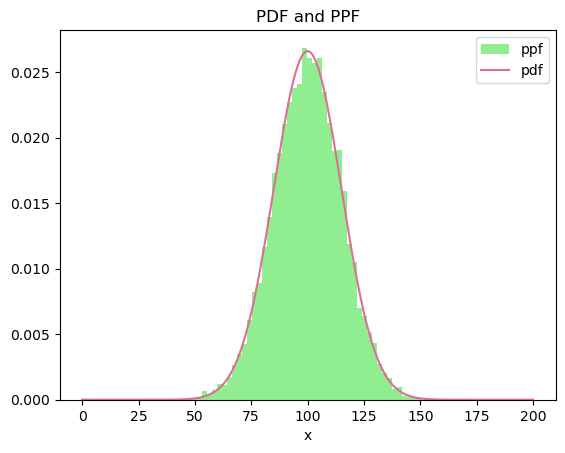

In [19]:
#overplotting the pdf and ppf

#ppf 
plt.hist(ppf, bins=50, density=True, color='lightgreen', label="ppf")


#pdf
plt.plot(x_axis, dist_G.pdf(x_axis), color='palevioletred', label="pdf")

plt.xlabel('x')
plt.title('PDF and PPF')
plt.legend(loc="upper right")
plt.show()

They match &#x1F600;

#### Problem 2.3

From 2.1, the PDF at x = 145 is 0.0002954565607958672. 


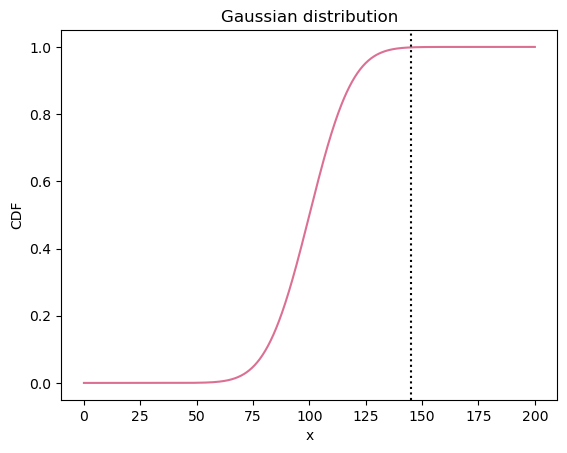

In [52]:
#visualize IQ > 145
plt.plot(x_axis, dist_G.cdf(x_axis), color='palevioletred')
plt.title('Gaussian distribution')

#vertical line at IQ = 145
plt.axvline(x=145, color = 'black', linestyle='dotted')

plt.xlabel('x')
plt.ylabel('CDF')
plt.show()

In [51]:
#using a calculation involving the cdf

#fraction of people with an IQ > 145: cdf(x > 145) = 1 - cdf(x < 145), based on the definition: 
#cdf(x) = P(X-x) --> cdf(145) = P(X-145)

x=145
x_above145 = 1 - scipy.stats.norm.cdf(x, mu, sigma) 


print(x_above145)

0.0013498980316301035


#### Problem 2.4

Determining what IQ correlates to "one in a million" involves the standard deviation of the distribution.
For Gaussian distributions, 99.7% of the data falls within 3 standard deviations, so an IQ that is "one in a million" is at least more than 3 standard deviations away from the mean. Based on this information, we know that this value is either less than 55 or greater than 145. (plus/minus 3 standard deviations)

We can use the cdf to find this IQ score. We are given the fraction of people (cdf = 1/1000000), and now have to find how many standard deviations the x-value (correlated with this cdf value) is from the mean (ie, z-score). From this, we can determine the x-value, or, IQ score that is one in a million.

In [278]:
#one in a million expressed as a cdf value
cdf_1 = 1/1000000

#use ppf (inverse of cdf) to find the number of standard deviations away from the mean cdf_1 is
#the number of standard deviations is the z-score, which is z = (x - mu)/sigma 
z = scipy.stats.norm.ppf(cdf_1)


#find the IQ score by rearranging the z-score formula and letting x = IQ
IQ = mu + (np.abs(z) * sigma)


print("z-score:", np.abs(z))
print("IQ:",IQ)

z-score: 4.753424308822899
IQ: 171.30136463234348


<span style="color:red">SRT: Great on this question!</span>

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

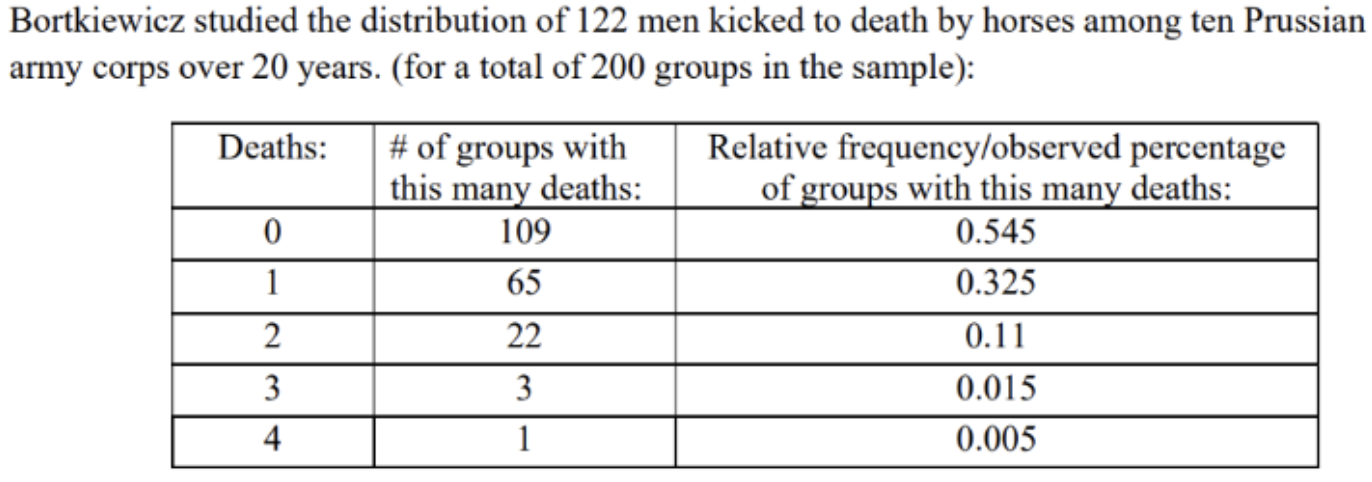

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

#### Problem 3.1

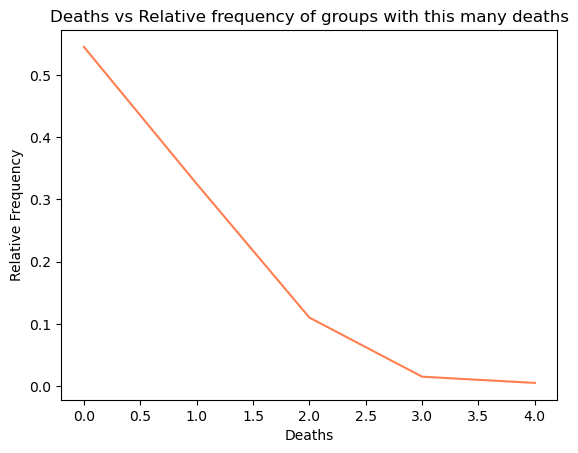

In [3]:
deaths = [0, 1, 2, 3, 4]
relative_frequency = [0.545, 0.325, 0.11, 0.015, 0.005]

plt.plot(deaths, relative_frequency, color='coral')
plt.title('Deaths vs Relative frequency of groups with this many deaths')
plt.xlabel('Deaths')
plt.ylabel('Relative Frequency')
plt.show()

#### Problem 3.2

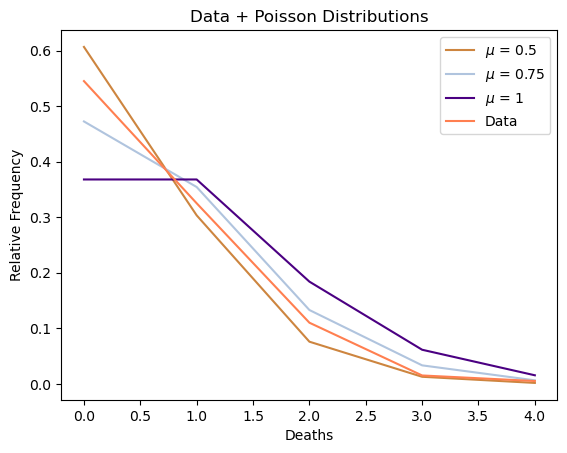

In [5]:
xaxis = np.arange(0, 5, 1)

mu_1 = 0.5
dist_P1 = scipy.stats.poisson(mu_1) #poisson distribution

mu_2 = 0.75
dist_P2 = scipy.stats.poisson(mu_2)

mu_3 = 1
dist_P3 = scipy.stats.poisson(mu_3)

#k = dist_P.rvs(10) # make 10 draws
pmf1 = dist_P1.pmf(xaxis) 
pmf2 = dist_P2.pmf(xaxis)
pmf3 = dist_P3.pmf(xaxis)

#plot poisson distributions
plt.plot(xaxis, pmf1, color='peru', label="$\mu$ = 0.5")
plt.plot(xaxis, pmf2, color='lightsteelblue', label="$\mu$ = 0.75")
plt.plot(xaxis, pmf3, color='indigo', label="$\mu$ = 1")

#data
plt.plot(deaths, relative_frequency, color='coral', label="Data")
plt.title('Data + Poisson Distributions')
plt.xlabel('Deaths')
plt.ylabel('Relative Frequency')
plt.legend(loc="upper right")
plt.show()



#### Problem 3.3

In [11]:
#weighted mean
deaths = [0, 1, 2, 3, 4]
relative_frequency = [0.545, 0.325, 0.11, 0.015, 0.005]
weighted = [0*0.545, 1*0.325, 2*0.11, 3*0.015, 4*0.005] #weight 0, 1, 2, 3, 4 with their relative frequencies
weighted_mu = sum(weighted) / sum(relative_frequency)

#formulas below are from the lecture 3 "poisson distribution" section

#standard deviation
st_d = (weighted_mu)**(1/2)

#median
median = np.median(weighted)

#mode 
mode = np.abs(weighted_mu - 1)

#skewness
skew = (weighted_mu)**(-1/2)

#kurtosis
kurtosis = (weighted_mu)**(-1)

#print values
print("weighted mean:", weighted_mu)
print("standard deviation:", st_d)
print("median:", median)
print("mode:", mode)
print("skewness:", skew)
print("kurtosis:", kurtosis)

weighted mean: 0.6100000000000001
standard deviation: 0.7810249675906655
median: 0.045
mode: 0.3899999999999999
skewness: 1.2803687993289596
kurtosis: 1.6393442622950818


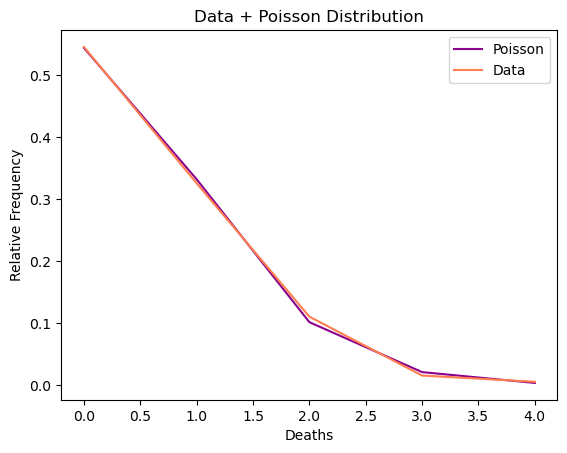

In [56]:
#poisson distribution
dist_P = scipy.stats.poisson(weighted_mu)
pmf = dist_P.pmf(xaxis)
plt.plot(xaxis, pmf, color='darkmagenta', label="Poisson")

#data
plt.plot(deaths, relative_frequency, color='coral', label="Data")
plt.title('Data + Poisson Distribution')
plt.xlabel('Deaths')
plt.ylabel('Relative Frequency')
plt.legend(loc="upper right")
plt.show()

<span style="color:red">SRT: Excellent</span>